<a href="https://colab.research.google.com/github/rashmic20/Phase5_Project/blob/main/Topic_Modelling_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('restaurant_reviews_cleaned.csv')

In [11]:
# Group by state and count the number of reviews
state_review_counts = df.groupby('state').size().reset_index(name='review_count')

# Display the review counts per state
print(state_review_counts)

   state  review_count
0     AB          6905
1     AZ         51067
2     CA         38201
3     DE          8892
4     FL        178513
5     ID         23601
6     IL          6840
7     IN         69993
8     LA         85070
9     MO         58368
10    NC             1
11    NJ         31569
12    NV         52794
13    PA        151617
14    TN         88264


 Number of reviews per state

<ipython-input-12-c081fae16cd3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='review_count', data=state_review_counts, palette=red_palette)


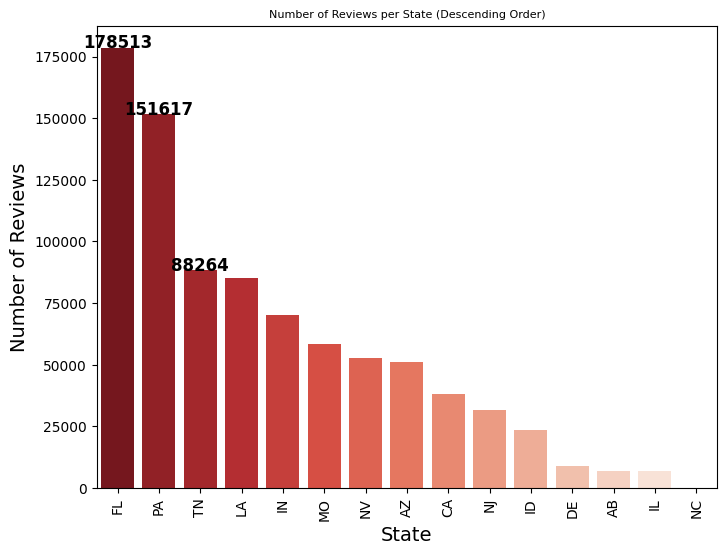

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by review_count in descending order
state_review_counts = state_review_counts.sort_values(by='review_count', ascending=False).reset_index(drop=True)

# Create a custom red palette where higher numbers are darker
red_palette = sns.color_palette("Reds", len(state_review_counts))
red_palette.reverse()  # Reverse the palette to make higher numbers darker

# Plotting the number of reviews per state in descending order with the custom red palette
plt.figure(figsize=(8,6))
sns.barplot(x='state', y='review_count', data=state_review_counts, palette=red_palette)
plt.title('Number of Reviews per State (Descending Order)', fontsize=8)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=90)

# Annotate the top 3 states
for i in range(3):
    plt.text(i, state_review_counts['review_count'][i] + 5,
             f'{state_review_counts["review_count"][i]}',
             color='black', ha="center", fontsize=12, fontweight='bold')

plt.show()


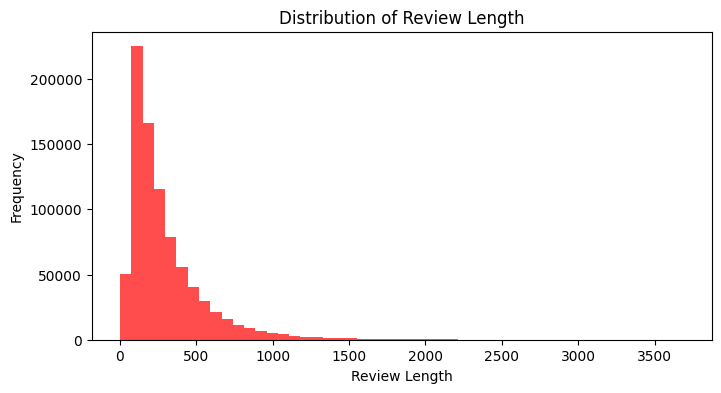

In [13]:
df['review_length'] = df['cleaned_text'].apply(len)
plt.figure(figsize=(8, 4))
plt.hist(df['review_length'], bins=50, color='red', alpha=0.7)
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

Let's filter dataset for reviews from the states of Florida (FL), Pennsylvania (PA), and Los Angeles (LA)

In [12]:
# Filter for reviews in FL, PA, and LA
filtered_df = df[df['state'].isin(['FL', 'PA', 'LA'])]


In [16]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415200 entries, 1 to 851693
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   review_id      415200 non-null  object 
 1   user_id        415200 non-null  object 
 2   business_id    415200 non-null  object 
 3   stars_x        415200 non-null  int64  
 4   date           415200 non-null  object 
 5   name           415200 non-null  object 
 6   city           415200 non-null  object 
 7   state          415200 non-null  object 
 8   postal_code    415200 non-null  object 
 9   latitude       415200 non-null  float64
 10  longitude      415200 non-null  float64
 11  stars_y        415200 non-null  float64
 12  review_count   415200 non-null  int64  
 13  categories     415200 non-null  object 
 14  cleaned_text   415200 non-null  object 
 15  sentiment      415200 non-null  int64  
 16  review_length  415200 non-null  int64  
dtypes: float64(3), int64(4), object(10

In [17]:
# Count the number of reviews (length of the 'stars_x' column) for each state
review_counts = filtered_df.groupby('state')['stars_x'].count()

# Display the number of reviews for each state
print(review_counts)

state
FL    178513
LA     85070
PA    151617
Name: stars_x, dtype: int64


Import Libraries for text preprocessing

In [6]:
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.models.phrases import Phrases, Phraser
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import spacy

# Download the 'stopwords' dataset
nltk.download('stopwords')

# Load NLTK stopwords
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Remove stopwords

In [3]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


Create bigram and trigram models to form Bigrams and Trigrams

In [13]:
# Create bigram and trigram models

# Assuming you have a pandas DataFrame named 'df' with a column 'cleaned_text'
# Import pandas
import pandas as pd

# Download the 'stopwords' dataset
nltk.download('stopwords')

# Load NLTK stopwords
stop_words = stopwords.words('english')

# Example DataFrame (replace with your actual data)
filtered_df = pd.DataFrame({'cleaned_text': ["This is the first document.", "This document is the second document.", "And this is the third one.", "Is this the first document?"]})

# Preprocess and tokenize the 'cleaned_text' column using simple_preprocess
texts = [simple_preprocess(doc) for doc in df['cleaned_text']]

# Create bigram and trigram models
bigram = Phrases(texts, min_count=5, threshold=100)
trigram = Phrases(bigram[texts], threshold=100)

# Faster way to get a sentence with bigrams/trigrams
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lemmatization: To reduce words to their base form, but here we’ll limit it to nouns, verbs, and adjectives.

In [14]:
# Initialize spacy 'en' model, keeping only tagger component (for lemmatization)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Lemmatize the words, keeping only nouns, adjectives, verbs, and adverbs"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


Apply the Preprocessing Steps

In [15]:
# Assume 'texts' is a list of tokenized text data

# Remove stopwords
texts_nostops = remove_stopwords(texts)

# Form bigrams
texts_bigrams = make_bigrams(texts_nostops)

# Form trigrams
texts_trigrams = make_trigrams(texts_bigrams)

# Lemmatization keeping only nouns, adjectives, verbs, and adverbs
texts_lemmatized = lemmatization(texts_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB'])


Create Dictionary and Corpus

In [1]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(texts_lemmatized)

# Filter out extremes to limit the number of features
id2word.filter_extremes(no_below=15, no_above=0.5)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts_lemmatized]

NameError: name 'gensim' is not defined

Now we have id2word (the dictionary) and corpus (the term-document frequency) ready to be used for LDA modeling.